In [1]:
from astropy.io import fits
from matplotlib import pyplot as plt
import re
import numpy as np

In [2]:
def write_to_txt(filename, content):
    with open(filename, 'a+') as file:
        file.write(content + '\n')

def find_grade(filename):
    hdul = fits.open(filename)
    event_data = hdul[1].data
    grade_0_events = event_data[event_data['GRADE'] == 0]
    grade_1_events = event_data[event_data['GRADE'] == 1]
    grade_2_events = event_data[event_data['GRADE'] == 2]
    # 统计grade 0事件的数量
    num_grade_0_events = len(grade_0_events)
    num_grade_1_events = len(grade_1_events)
    num_grade_2_events = len(grade_2_events)
    hdul.close()
    return num_grade_0_events,num_grade_1_events,num_grade_2_events

def process_fits_file(fits_filename, output_filename):
    # 获取每个等级事件的数量
    num_grade_0_events, num_grade_1_events, num_grade_2_events = find_grade(fits_filename)
    # 计算grade0占grade0-2的比例
    total_grade_0_2_events = num_grade_0_events + num_grade_1_events + num_grade_2_events
    if total_grade_0_2_events == 0:
        ratio_grade0 = 0
    else:
        ratio_grade0 = num_grade_0_events / total_grade_0_2_events
    # 构建内容字符串
    content = (
        f"File: {fits_filename}\n"
        f"Grade 0 events: {num_grade_0_events}\n"
        f"Grade 1 events: {num_grade_1_events}\n"
        f"Grade 2 events: {num_grade_2_events}\n"
        f"Grade 0 / (Grade 0 + Grade 1 + Grade 2) ratio: {ratio_grade0:.4f}\n"
    )
    # 写入文本文件
    write_to_txt(output_filename, content)




In [3]:
## 写入文件event_counts.txt

In [4]:
for i in range(0,21):
    filename=f"c{i}.evt"
    output_filename = 'event_counts.txt'
    process_fits_file(filename, output_filename)

In [3]:
def read_txt_file(filename):
    with open(filename, 'r') as file:
        return file.read()

def parse_data(content):
    pattern = re.compile(
        r"File: (.+)\n"
        r"Grade 0 events: (\d+)\n"
        r"Grade 1 events: (\d+)\n"
        r"Grade 2 events: (\d+)\n"
        r"Grade 0 / \(Grade 0 \+ Grade 1 \+ Grade 2\) ratio: ([0-9.]+)"
    )
    
    matches = pattern.findall(content)
    
    files = np.arange(0,21)
    grade0_counts = []
    total_counts = []
    ratios = []
    
    for match in matches:
        file_name, grade0, grade1, grade2, ratio = match
        grade0 = int(grade0)
        grade1 = int(grade1)
        grade2 = int(grade2)
        ratio = float(ratio)
        
        total = grade0 + grade1 + grade2
        
        grade0_counts.append(grade0)
        total_counts.append(total)
        ratios.append(ratio)
    
    return files, grade0_counts, total_counts, ratios

In [6]:
## 读取文件event_counts.txt

In [4]:
input_filename = 'event_counts.txt'
content = read_txt_file(input_filename)
files, grade0_counts, total_counts, ratios = parse_data(content)

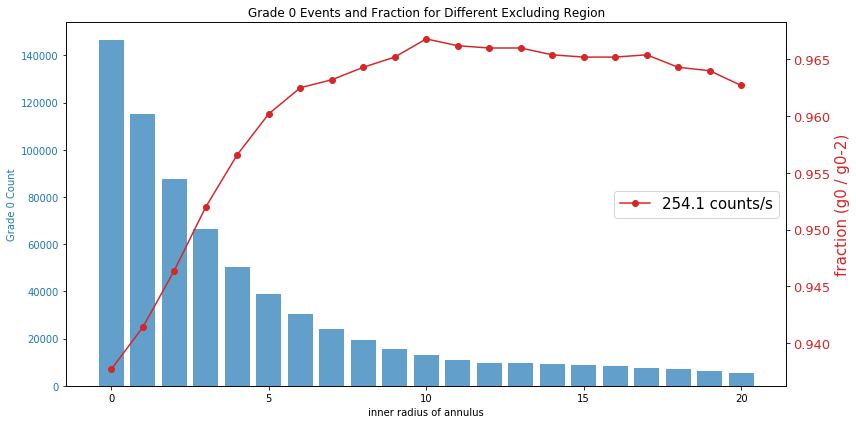

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

plt.rcParams['axes.labelsize'] = 15  # 坐标轴标签的字体大小
plt.rcParams['xtick.labelsize'] = 13  # x轴刻度标签的字体大小
plt.rcParams['ytick.labelsize'] = 13  # y轴刻度标签的字体大小
plt.rcParams['legend.fontsize'] = 15  # 图例字体大小
# plt.rcParams['title.fontsize'] = 16  # 图表标题的字体大小

color = 'tab:blue'
ax1.set_xlabel('inner radius of annulus')
ax1.set_ylabel('Grade 0 Count', color=color)
ax1.bar(files, grade0_counts, color=color, alpha=0.7, label='Grade 0 Count')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('fraction (g0 / g0-2)', color=color)
ax2.plot(files, ratios, color=color, marker='o', linestyle='-', label='254.1 counts/s')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="center right")

plt.title('Grade 0 Events and Fraction for Different Excluding Region')
plt.xticks(rotation=90)
fig.tight_layout()
plt.savefig("ratio.png",dpi=500)
plt.show()

In [27]:
# 打开FITS文件
filename = 'c15.evt'
hdul = fits.open(filename)

# 查看FITS文件的结构
hdul.info()

# 获取事件数据表
event_data = hdul[1].data

print(event_data[0])

# 关闭FITS文件
hdul.close()


Filename: c15.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  EVENTS        1 BinTableHDU    461   8090R x 11C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 16X, 1I, 1J]   
  2  GTI           1 BinTableHDU     52   1R x 2C   [1D, 1D]   
  3  REG00101      1 BinTableHDU     79   1R x 6C   [1PD(1), 1PD(1), 16A, 1PD(2), 1PD(0), 1PI(1)]   
(728628668.2286764, 422, 489, 368, 112, 369, 299, 395, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False]), 0, 151)


In [28]:
# 打开FITS文件
filename = 'sw00089766002xwtw2po_cl.evt'
hdul = fits.open(filename)

# 查看FITS文件的结构
hdul.info()

# 获取事件数据表
event_data = hdul[1].data

print(event_data[0])

# 关闭FITS文件
hdul.close()

Filename: sw00089766002xwtw2po_cl.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  EVENTS        1 BinTableHDU    468   230055R x 11C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 16X, 1I, 1J]   
  2  GTI           1 BinTableHDU    111   1R x 2C   [1D, 1D]   
  3  BADPIX        1 BinTableHDU    145   5R x 6C   [1I, 1I, 1I, 1I, I, 16X]   
(728628668.0774531, 406, 486, 385, 27, 386, 299, 244, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False]), 0, 103)
